# Lab 6: Linear Regression

***
- **FIRST name**: Muhammad Affan
- **LAST name**: Nazir
- **Student ID**: 1807593

Leave blank if individual:
- **Collaborator names**:
- **Collaborator student IDs**:
***

In today's lab, you will learn:

1.   The process of making predictions;
2.   linear regression.

For this lab, you'll need the dataset `family_heights.csv`.

### Instructions
<!-- **Deadline.**  This assignment is due at ****.  Please check the syllabus for late submissions. -->
You are expected to write clear, detailed, and complete answers when analysing your data. Lack of this may result in point deductions.

**Reminder.** You must submit your own work.  The collaboration policy for the assignments is Consultation Collaboration. You may verbally discuss concepts with your classmates, without exchanging written text, code, or detailed advice.  You must develop your own solution and submit your own work.  All sources of information used including books, websites, students you talked to, must be cited in the submission.  Please see the course FAQ document for details on this collaboration policy.  We will adhere to current Faculty of Science guidelines on dealing with suspected cases of plagiarism.

You must use this notebook to complete your assignment. You will execute the questions in the notebook. The questions might ask for a short answer in text form or for you to write and execute a piece of code. Make sure you enter your answer in either case only in the cell provided. Do not use a different cell and do not create a new cell. Creating new cells for your code is not compatible with the auto-grading system we are using and thus your assignment will not get grading properly and you will lose marks for that question.

Your submitted notebook should run on our local installation.  So if you are importing packages not listed in the notebook or using local data files not included in the assignment package, make sure the notebook is self-contained with a requirements.txt file or cells in the notebook itself to install the extra packages.  If we cannot run your notebook, you will lose 50% of the marks, and any additional marks that may be lost due to wrong answers.

### Submission Instructions
When you are done, you will submit your work from the notebook. Make sure to save your notebook before running it, and then submit on Canvas the notebook file with your work completed. Name your file with your **Student ID number** and the assignment number (ex: 1234567_L6.ipynb). Failure to do so will result in a zero!

In [4]:
#run this cell
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1. Predictions

Predictions are an important part of data science because they allow us to make educated guesses based on incomplete data. These guesses are usually in the form of continuous or categorical values. The primary goal of building a predictive model is to make accurate and reliable forecasts based on historical data. 

**Question 1.1.** Load the dataset `family_heights.csv` and assign it to the name `heights`. This dataset contains data on the midparent height and child’s height (all in inches) for a population of 934 adult “children”. The midpoint height is an average of the heights of the two parents.

In [6]:
# YOUR CODE HERE
heights = pd.read_csv("./family_heights.csv")


heights

,family,father,mother,midparentHeight,children,childNum,sex,childHeight
0,1,78.5,67.0,75.43,4,1,male,73.2
1,1,78.5,67.0,75.43,4,2,female,69.2
2,1,78.5,67.0,75.43,4,3,female,69.0
3,1,78.5,67.0,75.43,4,4,female,69.0
4,2,75.5,66.5,73.66,4,1,male,73.5
...,...,...,...,...,...,...,...,...
929,203,62.0,66.0,66.64,3,1,male,64.0
930,203,62.0,66.0,66.64,3,2,female,62.0
931,203,62.0,66.0,66.64,3,3,female,61.0
932,204,62.5,63.0,65.27,2,1,male,66.5


In [ ]:
# TEST CELL: do not delete!

**Question 1.2.** Use matplot's `scatter` function to make a scatter plot where `midparentHeight` is the x-axis and `childHeight` is the y-axis. Make sure to include the appropriate labels! 

Text(0.5, 1.0, 'Child Height vs Mid-Parent Height')

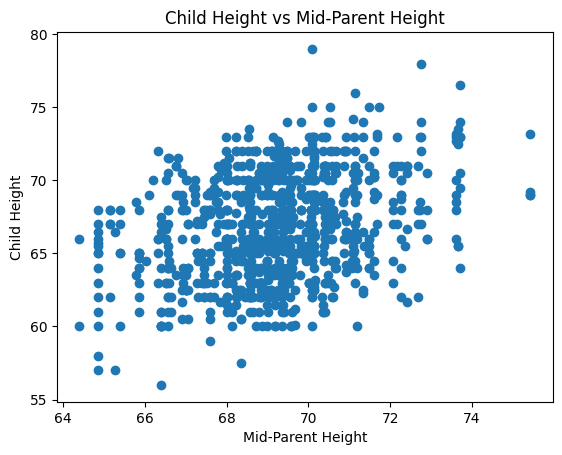

In [11]:
# YOUR CODE HERE
plt.scatter(heights["midparentHeight"], heights["childHeight"])
plt.xlabel("Mid-Parent Height")
plt.ylabel("Child Height")
plt.title("Child Height vs Mid-Parent Height")

The reason for studying this data is to be able to predict the adult height of a child born to parents who are similar to those in the dataset. Suppose there's a new couple that wants to predict their child's height. Let the average height of the couple be 70 inches. How would we make a reasonable prediction? </p>

One approach would be to make our prediction based on the parent average around a height of 70 inches, say within .5 inches. The prediction equals the average child's height calculated from those points alone.

**Question 1.3.** Find the average of the parent heights between 69.5 and 70.5 inches, rounded to four decimal points. Assign your answer to the name `close_to_70`.

In [19]:
# YOUR CODE HERE
close_to_70 = heights[ (heights["midparentHeight"] >= 69.5) & (heights["midparentHeight"] <= 70.5)]
close_to_70 = close_to_70["midparentHeight"].mean()

close_to_70

69.98586425339367

In [20]:
# TEST CELL: do not delete!

Run the cell below. The red lines show us the data points considered in our calculation above. The gold point represents our predicted child height based on the parent's height. 

In [34]:
plt.scatter(midParentHeight, child, s = 10)
plt.xlabel('Parent Average')
plt.ylabel('Child')

plt.plot([69.5, 69.5], [50, 85], color='red', lw=2)  # plots red vertical lines
plt.plot([70.5, 70.5], [50, 85], color='red', lw=2)
plt.scatter(70, close_to_70, color='gold', s=40);  # plots gold point

NameError: name 'midParentHeight' is not defined

Instead of repeating these steps for each point we'd like to predict, we can implement a function instead!

**Question 1.4.** Implement a function called `predict_child` whose only argument is the average height of the parents. The function should return the predicted height of the child, rounded to four decimal points.

In [76]:
# YOUR CODE HERE
def predict_child(avg):
    lower_bound = avg - 0.5
    upper_bound = avg + 0.5
    
    filtered_children = heights[
        (heights['midparentHeight'] >= lower_bound) &
        (heights['midparentHeight'] <= upper_bound)
    ]['childHeight']
    predicted_height = round(filtered_children.mean(), 4)
    return predicted_height
predict_child(70)

67.2729

In [78]:
# TEST CELL: do not delete!
### VISIBLE TESTS
assert(predict_child(70) == 67.2729)

We can get a sense of how good our predictions are by comparing the predictions with the data we already have. Let's use our function defined above to calculate the predicted child height of each average couple height.

**Question 1.5.** Write a `for` loop that goes through each average parent height in `heights` and uses the `child_predictions` function to calculate the child's height. Append each answer to the array `child_predictions`.

In [85]:
child_predictions = []

# YOUR CODE HERE
for i in heights["midparentHeight"]:
    child_predictions.append(predict_child(i))

# the code below makes a copy of heights and inserts the Predictions column
height_and_prediction = heights.copy()
height_and_prediction.insert(8, "Predictions", child_predictions, True)
height_and_prediction

,family,father,mother,midparentHeight,children,childNum,sex,childHeight,Predictions
0,1,78.5,67.0,75.43,4,1,male,73.2,70.1000
1,1,78.5,67.0,75.43,4,2,female,69.2,70.1000
2,1,78.5,67.0,75.43,4,3,female,69.0,70.1000
3,1,78.5,67.0,75.43,4,4,female,69.0,70.1000
4,2,75.5,66.5,73.66,4,1,male,73.5,70.4158
...,...,...,...,...,...,...,...,...,...
929,203,62.0,66.0,66.64,3,1,male,64.0,65.1566
930,203,62.0,66.0,66.64,3,2,female,62.0,65.1566
931,203,62.0,66.0,66.64,3,3,female,61.0,65.1566
932,204,62.5,63.0,65.27,2,1,male,66.5,64.2296


In [ ]:
# TEST CELL: do not delete!

To compare two sets of data, we can scatter two plots on the same set of axes *as long as the x-axis is the same for both datasets*. 

**Question 1.6.** Scatter the parent average data like you did above, then plot the `Predictions` data that you found. Make sure that both x-axes are the same and include the appropriate labels!

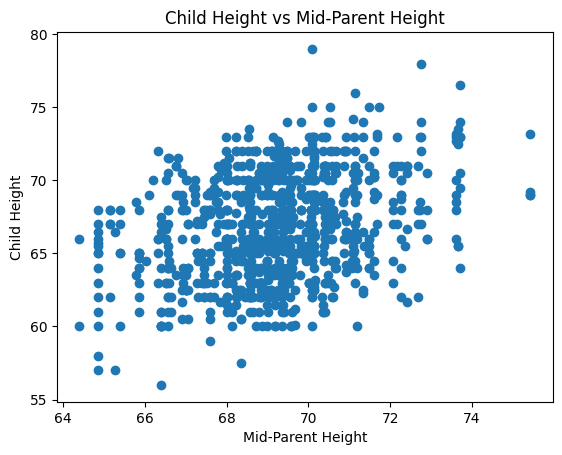

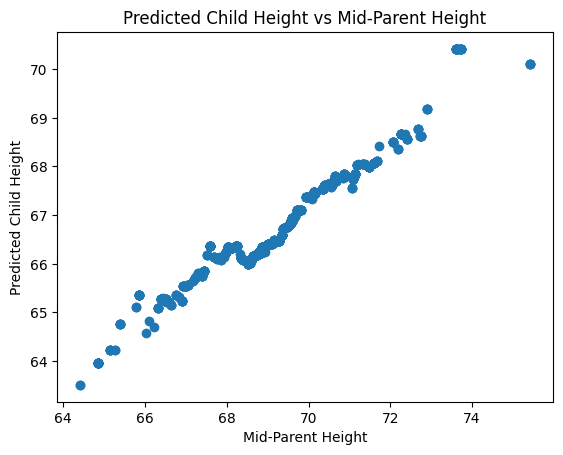

In [92]:
# YOUR CODE HERE
plt.scatter(height_and_prediction["midparentHeight"], height_and_prediction["childHeight"])
plt.xlabel("Mid-Parent Height")
plt.ylabel("Child Height")
plt.title("Child Height vs Mid-Parent Height")
plt.show()


plt.scatter(height_and_prediction["midparentHeight"], height_and_prediction["Predictions"])
plt.xlabel("Mid-Parent Height")
plt.ylabel("Predicted Child Height")
plt.title("Predicted Child Height vs Mid-Parent Height")

plt.show()

The graph of predictions is called a *graph of averages* because each dot is the average of a vertical strip (like we did in question 1.3.). Notice how the graph of averages roughly follows a straight line. This line is called the *regression line* and is a common method for making predictions.

# 2. Regression Models

You may recall from you stats classes the correlation coefficient, $r$, and how it's used to quantify the linear relationship between two variables. It turns out that  $r$ also helps us identify the straight line about which our datapoints are clustered, making useful for linear regression models. 

**Question 2.1.** Use the `corrcoef` function to calculate the correlation coefficient between the predicted data above and the average parent height. Assign your answer to the name `correlation_coefficient`.

In [96]:
# YOUR CODE HERE
correlation_coefficient = np.corrcoef(height_and_prediction['midparentHeight'], height_and_prediction['Predictions'])

In [ ]:
# TEST CELL: do not delete!

**Question 2.2.** What does this correlation coefficient tell us about the relationships in `Predictions`? Is the data i.i.d.?

The corealtion coefficent is 0.97321412. This suggests a strong linear relationship.

## 2.1. Standard Units

Notice that when we calculate $r$, it doesn't use any units. This is because $r$ is based on *standard units*.  To calculate standard units, subtract the mean from the data point and divide by the standard deviation: $$Z = \frac{X - \mu}{\sigma}$$

**Question 2.1.1.** Create a function that converts an array of numbers to standard units. The function takes one argument which is the original array and returns the converted array. Then, create a new DataFrame that contains the converted data with the columns `MidParent SU` and `Child SU`.   Assign your new DataFrame to `heights_SU`.

In [132]:
# YOUR CODE HERE
def standerdizeArray(array):
    mean = np.array(array).mean()
    std = np.array(array).std()
    stdArray = [ (x-mean)/std for x in array ]
    return stdArray
    
heights_SU = heights.copy()
heights_SU["MidParent SU"] = standerdizeArray(stdHeights["midparentHeight"])
heights_SU["Child SU"] = standerdizeArray(stdHeights["childHeight"])

In [ ]:
# TEST CELL: do not delete!

On this scale, we can calculate our predictions exactly as before. But first we have to figure out how to convert our old definition of “close” points to a value on the new scale. We had said that midparent heights were “close” if they were within 0.5 inches of each other. Since standard units measure distances in units of SDs, we have to figure out how many SDs of midparent height correspond to 0.5 inches.

**Question 2.1.2.** Calculate how many inches **one** SD of midparent heights is. How many SDs would 0.5 inches be? Assign your answers to `sd_midparent` and `close` respectively.

In [133]:
# YOUR CODE HERE
sd_midparent = heights_SU["midparentHeight"].std()
close = 0.5 / sd_midparent

In [ ]:
# TEST CELL: do not delete!

**Question 2.1.3.** Now, make a function like you did in question 1.4. but instead of subtracting and adding 0.5, use your `close` variable that you defined above. Name your function `predict_child_SU` and round your answer to 4 decimal points.

In [134]:
# YOUR CODE HERE
def predict_child_SU(avg):
    lower_bound = avg - close
    upper_bound = avg + close
    
    filtered_children = stdHeights[
        (heights_SU['MidParent SU'] >= lower_bound) &
        (heights_SU['MidParent SU'] <= upper_bound)
    ]['Child SU']
    predicted_height = round(filtered_children.mean(), 4)
    return predicted_height

Write a for loop that iterates through all of `MidParent SU` and uses `predict_child_SU` to predict the child's SU. Append your answers to `child_predictions_SU`.

In [137]:
child_predictions_SU = []

# YOUR CODE HERE
for i in heights_SU["MidParent SU"]:
    child_predictions_SU.append(predict_child_SU(i))

# the code below makes a copy of heights_SU and inserts the Predictions SU column
height_and_prediction_SU = heights_SU.copy()
height_and_prediction_SU.insert(2, "Predictions SU", child_predictions_SU, True)
height_and_prediction_SU

,family,father,Predictions SU,mother,midparentHeight,children,childNum,sex,childHeight,MidParent SU,Child SU
0,1,78.5,0.9376,67.0,75.43,4,1,male,73.2,3.454652,1.804156
1,1,78.5,0.9376,67.0,75.43,4,2,female,69.2,3.454652,0.686005
2,1,78.5,0.9376,67.0,75.43,4,3,female,69.0,3.454652,0.630097
3,1,78.5,0.9376,67.0,75.43,4,4,female,69.0,3.454652,0.630097
4,2,75.5,1.0259,66.5,73.66,4,1,male,73.5,2.472085,1.888017
...,...,...,...,...,...,...,...,...,...,...,...
929,203,62.0,-0.4443,66.0,66.64,3,1,male,64.0,-1.424873,-0.767591
930,203,62.0,-0.4443,66.0,66.64,3,2,female,62.0,-1.424873,-1.326667
931,203,62.0,-0.4443,66.0,66.64,3,3,female,61.0,-1.424873,-1.606205
932,204,62.5,-0.7034,63.0,65.27,2,1,male,66.5,-2.185390,-0.068747


In [ ]:
# TEST CELL: do not delete!

**Question 2.1.4.** Now make a scatter plot that uses the SU data. 

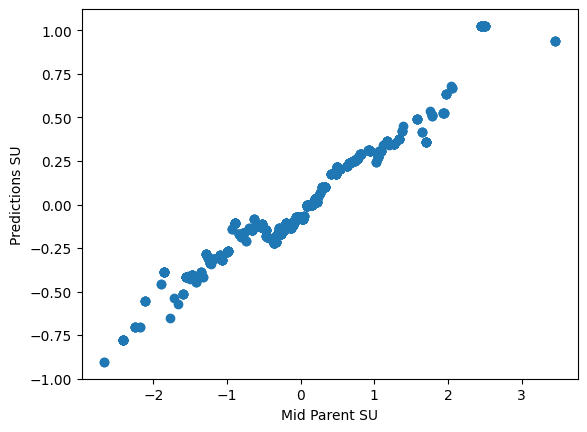

In [139]:
# YOUR CODE HERE
plt.scatter(height_and_prediction_SU["MidParent SU"],height_and_prediction_SU["Predictions SU"])
plt.xlabel("Mid Parent SU")
plt.ylabel("Predictions SU")

plt.show()

Notice how the plotted SU data is the exact same as the original data, only the axes are different. This confirms that we can understand the prediction process using standard units.

## 2.2. The Regression Line

In regression, we use the value of one variable, $x$, to predict the value of another, $y$. When the variables are measured in standard units, the regression line for predicting based on has slope $$r * \frac{SD_y}{SD_x}$$
 and passes through the origin $$\bar{y} - slope * \bar{x}$$

**Question 2.2.1.** Write two functions called `slope` and `intercept` that use the equations above. Both functions should have three arguments that take in a Dataframe, label x, and label y.

In [147]:
# YOUR CODE HERE
def slope(df, label_x, label_y):
    sd_x = df[label_x].std()
    sd_y = df[label_y].std()
    
    r = df[label_x].corr(df[label_y])

    slope_value = r * (sd_y / sd_x)
    return slope_value

def intercept(df, label_x, label_y):
    mean_x = df[label_x].mean()
    mean_y = df[label_y].mean()
    
    intercept_value = mean_y - slope(df, label_x, label_y) * mean_x
    return intercept_value


In [146]:
#run this cell
family_slope = slope(heights, 'midparentHeight', 'childHeight')
family_intercept = intercept(heights, 'midparentHeight', 'childHeight')
family_slope, family_intercept

(0.637360896969479, 22.63624054958975)

In [ ]:
# TEST CELL: do not delete!

The equation for the regression line is $$estimate\:of\:child's\:height = 0.64 * midParent\:height + 22.64$$ For example, for a midparent height of 70.48 inches, the regression equation predicts the child’s height to be 67.56 inches.

In [148]:
family_slope * 70.48 + family_intercept

67.55743656799862

**Question 2.2.2.** Write a function called `reg_prediction` that takes in one argument as the parent height average and returns the regression equation that predicts the child's height. Then, use that function and a for loop to calculate the regression predictions. Append your answers to `regression_predictions`. 

In [149]:
# YOUR CODE HERE
def reg_prediction(avg):
    return 0.64 * avg + 22.64

In [153]:
regression_predictions = []

# YOUR CODE HERE
for i in heights["midparentHeight"]:
    regression_predictions.append( reg_prediction(i) )

# the code below makes a copy of heights and inserts the Predictions column
height_and_prediction.insert(9, "Regression Predictions", regression_predictions, True)
height_and_prediction

,family,father,mother,midparentHeight,children,childNum,sex,childHeight,Predictions,Regression Predictions,Regression Predictions
0,1,78.5,67.0,75.43,4,1,male,73.2,70.1000,70.9152,70.9152
1,1,78.5,67.0,75.43,4,2,female,69.2,70.1000,70.9152,70.9152
2,1,78.5,67.0,75.43,4,3,female,69.0,70.1000,70.9152,70.9152
3,1,78.5,67.0,75.43,4,4,female,69.0,70.1000,70.9152,70.9152
4,2,75.5,66.5,73.66,4,1,male,73.5,70.4158,69.7824,69.7824
...,...,...,...,...,...,...,...,...,...,...,...
929,203,62.0,66.0,66.64,3,1,male,64.0,65.1566,65.2896,65.2896
930,203,62.0,66.0,66.64,3,2,female,62.0,65.1566,65.2896,65.2896
931,203,62.0,66.0,66.64,3,3,female,61.0,65.1566,65.2896,65.2896
932,204,62.5,63.0,65.27,2,1,male,66.5,64.2296,64.4128,64.4128


In [ ]:
# TEST CELL: do not delete!

**Question 2.2.3.** Now, make a scatter plot that includes the original child height data, the predicted data, and the regression prediction data.

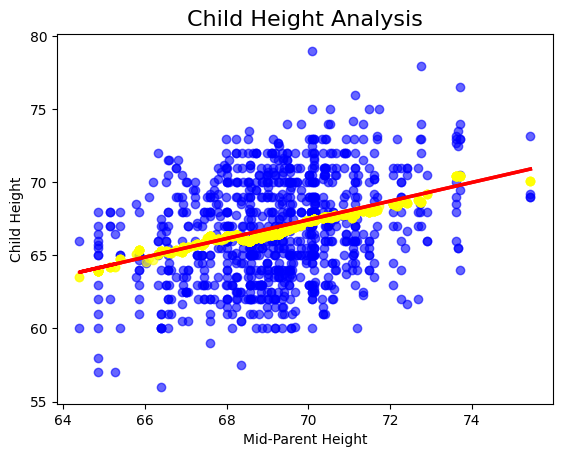

In [158]:
# YOUR CODE HERE

plt.scatter(height_and_prediction['midparentHeight'], height_and_prediction['childHeight'], color='blue', label='Original Data', alpha=0.6)

plt.scatter(height_and_prediction['midparentHeight'], height_and_prediction['Predictions'], color='yellow', label='Predicted Data', alpha=0.6)

plt.plot(height_and_prediction['midparentHeight'], height_and_prediction['Regression Predictions'], color='red', label='Regression Prediction', linewidth=2.5)

plt.title('Child Height Analysis', fontsize=16)
plt.xlabel("Mid-Parent Height")
plt.ylabel("Child Height")

plt.show()

**Question 2.2.4.** Briefly comment on the regression predictions and how well it does in approximating the child heights.

In the scatter plot, the blue dots represent the actual data. The Golden/Yellow dots represent the predicted data, and the red line presents the height predicted using the regression. As seen, the predictions using regression are very accurate, and approcimate the childs height with decent accuracy

# Rubric

| Question | Points| 
|----------|----------|
| 1.1.   | 2   | 
| 1.2.    | 10   | 
| 1.3.    | 10   | 
| 1.4.   | 10   | 
| 1.5.    | 5  | 
| 1.6.   | 15   | 
| 2.1.    | 5  | 
| 2.2.   | 5   | 
| 2.1.1.   | 20   | 
| 2.1.2.    | 8  | 
| 2.1.3.   | 20   | 
|2.1.4.    | 10  | 
| 2.2.1.   | 10   | 
| 2.2.2.  | 10   | 
| 2.2.3.   | 10   | 
| 2.2.4.    | 3  |  
| Total:    | 153   | 


family_heights: data8